In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.express as px 

In [2]:
import tensorflow as tf

C:\Users\umair\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [219]:
# Reading the CSV file 
df = pd.read_csv(r"C:\Users\umair\OneDrive\Desktop\EDA\autos.csv", encoding='latin-1') # The file got endcodings thus in order to read we use encoding 'latin-1'
df

dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

        seller offerType  price   abtest vehicleType  yearOfRegistration  \
0       privat   Angebot    480     test         NaN                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage          dateCreated  \
0        benzin      volkswagen               NaN  2016-03-24 00:00:00   
1        diesel            audi                ja  2016-03-24 00:00:00   
2        diesel            jeep               NaN  2016-03-14 00:00:00   
3        benzin      volkswagen              nein  2016-03-17 00:00:00   
4        diesel           skoda              nein  2016-03-31 00:00:00   
...         ...             ...               ...                  ...   
371523      NaN  sonstige_autos               NaN  2016-03-14 00:00:00   
371524   benzin           smart              nein  2016-03-05 00:00:00   
371525   diesel      volkswagen              nein  2016-03-19 00:00:00   
371526   diesel      volkswagen               NaN  2016-03-20 00:00:00   
371527   benzin             bmw              nein  2016-03-07 00:00:00   

        nrOfPictures  postalCode             lastSeen  
0                  0       70435  2016-04-07 03:16:57  
1                  0       66954  2016-04-07 01:46:50  
2                  0       90480  2016-04-05 12:47:46  
3                  0       91074  2016-03-17 17:40:17  
4                  0       60437  2016-04-06 10:17:21  
...              ...         ...                  ..

**Discription of the Coloumns** 

Reference: "https://data.world/data-society/used-cars-data"

The content of the data is in german, so one has to translate it first if one can not speak german. Those fields are included:

**dateCrawled**: when this ad was first crawled, all field-values are taken from this date

**name** : "name" of the car

**seller** : private or dealer

**offerType**

**price** : the price on the ad to sell the car

**abtest**

**vehicleType**

**yearOfRegistration** : at which year the car was first registered

**gearbox**

**powerPS** : power of the car in PS

**model**

**kilometer** : how many kilometers the car has driven

**monthOfRegistration** : at which month the car was first registered

**fuelType**

**brand**

**notRepairedDamage** : if the car has a damage which is not repaired yet

**dateCreated** : the date for which the ad at ebay was created

**nrOfPictures** : number of pictures in the ad

**postalCode**

**lastSeenOnline** : when the crawler saw this ad last online

In [4]:
df.columns #columns in the csv file

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
df.head()

dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  \
0     150000                    0   benzin  volkswagen               NaN   
1     125000                    5   diesel        audi                ja   
2     125000                    8   diesel        jeep               NaN   
3     150000                    6   benzin  volkswagen              nein   
4      90000                    7   diesel       skoda              nein   

           dateCreated  nrOfPictures  postalCode             lastSeen  
0  2016-03-24 00:00:00             0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00             0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00             0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00             0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00             0       60437  2016-04-06 10:17:21

In [6]:
#Coloumns that are not useful for us to use

df[['dateCrawled','name','dateCreated','nrOfPictures','postalCode','lastSeen']]

dateCrawled                                          name  \
0       2016-03-24 11:52:17                                    Golf_3_1.6   
1       2016-03-24 10:58:45                          A5_Sportback_2.7_Tdi   
2       2016-03-14 12:52:21                Jeep_Grand_Cherokee_"Overland"   
3       2016-03-17 16:54:04                            GOLF_4_1_4__3TÜRER   
4       2016-03-31 17:25:20                Skoda_Fabia_1.4_TDI_PD_Classic   
...                     ...                                           ...   
371523  2016-03-14 17:48:27                    Suche_t4___vito_ab_6_sitze   
371524  2016-03-05 19:56:21         Smart_smart_leistungssteigerung_100ps   
371525  2016-03-19 18:57:12            Volkswagen_Multivan_T4_TDI_7DC_UY2   
371526  2016-03-20 19:41:08                        VW_Golf_Kombi_1_9l_TDI   
371527  2016-03-07 19:39:19  BMW_M135i_vollausgestattet_NP_52.720____Euro   

                dateCreated  nrOfPictures  postalCode             lastSeen  
0       2016-03-24 00:00:00             0       70435  2016-04-07 03:16:57  
1       2016-03-24 00:00:00             0       66954  2016-04-07 01:46:50  
2       2016-03-14 00:00:00             0       90480  2016-04-05 12:47:46  
3       2016-03-17 00:00:00             0       91074  2016-03-17 17:40:17  
4       2016-03-31 00:00:00             0       60437  2016-04-06 10:17:21  
...                     ...           ...         ...                  ...  
371523  2016-03-14 00:00:00             0       39576  2016-04-06 00:46:52  
371524  2016-03-05 00:00:00             0       26135  2016-03-11 18:17:12  
371525  2016-03-19 00:00:00             0       87439  2016-04-07 07:15:26  
371526  2016-03-20 00:00:00             0       40764  2016-03-24 12:45:21  
371527  2016-03-07 00:00:00             0       73326  2016-03-22 03:17:10  

[371528 rows x 6 columns]

In [7]:
#Removing those coloumns which are not useful for us
df2= df.drop(['dateCrawled','name','dateCreated','nrOfPictures','postalCode','lastSeen'], axis=1)

In [8]:
df2

seller offerType  price   abtest vehicleType  yearOfRegistration  \
0       privat   Angebot    480     test         NaN                1993   
1       privat   Angebot  18300     test       coupe                2011   
2       privat   Angebot   9800     test         suv                2004   
3       privat   Angebot   1500     test  kleinwagen                2001   
4       privat   Angebot   3600     test  kleinwagen                2008   
...        ...       ...    ...      ...         ...                 ...   
371523  privat   Angebot   2200     test         NaN                2005   
371524  privat   Angebot   1199     test      cabrio                2000   
371525  privat   Angebot   9200     test         bus                1996   
371526  privat   Angebot   3400     test       kombi                2002   
371527  privat   Angebot  28990  control   limousine                2013   

          gearbox  powerPS        model  kilometer  monthOfRegistration  \
0         manuell        0         golf     150000                    0   
1         manuell      190          NaN     125000                    5   
2       automatik      163        grand     125000                    8   
3         manuell       75         golf     150000                    6   
4         manuell       69        fabia      90000                    7   
...           ...      ...          ...        ...                  ...   
371523        NaN        0          NaN      20000                    1   
371524  automatik      101       fortwo     125000                    3   
371525    manuell      102  transporter     150000                    3   
371526    manuell      100         golf     150000                    6   
371527    manuell      320      m_reihe      50000                    8   

       fuelType           brand notRepairedDamage  
0        benzin      volkswagen               NaN  
1        diesel            audi                ja  
2        diesel            jeep               NaN  
3        benzin      volkswagen              nein  
4        diesel           skoda              nein  
...         ...             ...               ...  
371523      NaN  sonstige_autos               NaN  
371524   benzin           smart              nein  
371525   diesel      volkswagen              nein  
371526   diesel      volkswagen               NaN  
371527   benzin             bmw              nein  

[371528 rows x 14 columns]

# Insights of each coloumn

Here we will be using data analysis and visulization

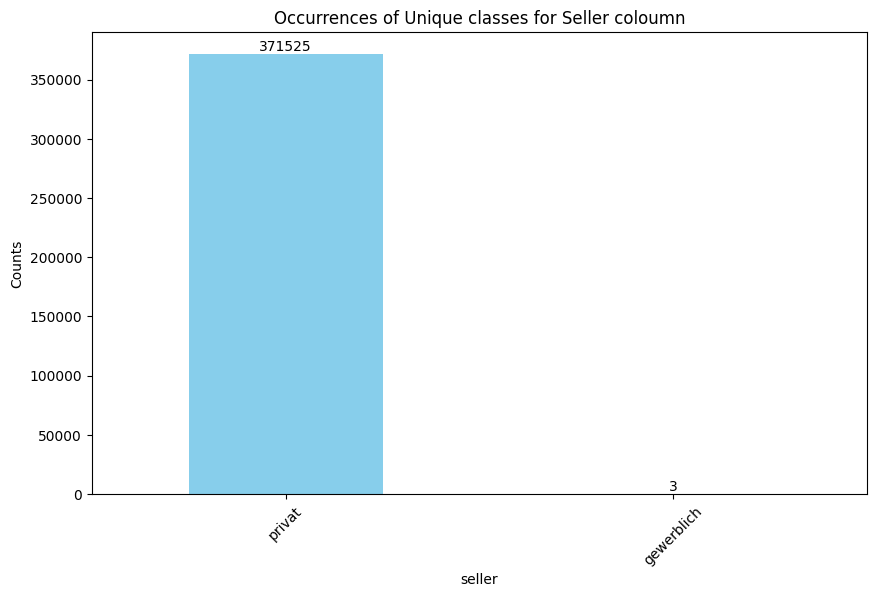

In [9]:
#Let's check unique values or categories in each coloumn


# Step 1: Get the unique values in the 'seller' column
unique_sellers = df2['seller'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['seller'].value_counts()


# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(10, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for Seller coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()

 **Observation**
 
 We can observe that for gewerblich class in 'Seller' column we just have 3 samples, thus it's not a good idea to use just privat class or just use gewerblich class, so the best solution is to remove this coloumn also

In [10]:
# Drop the seller coloumn from dataframe
df2=df2.drop(['seller'],axis =1)
df2

offerType  price   abtest vehicleType  yearOfRegistration    gearbox  \
0        Angebot    480     test         NaN                1993    manuell   
1        Angebot  18300     test       coupe                2011    manuell   
2        Angebot   9800     test         suv                2004  automatik   
3        Angebot   1500     test  kleinwagen                2001    manuell   
4        Angebot   3600     test  kleinwagen                2008    manuell   
...          ...    ...      ...         ...                 ...        ...   
371523   Angebot   2200     test         NaN                2005        NaN   
371524   Angebot   1199     test      cabrio                2000  automatik   
371525   Angebot   9200     test         bus                1996    manuell   
371526   Angebot   3400     test       kombi                2002    manuell   
371527   Angebot  28990  control   limousine                2013    manuell   

        powerPS        model  kilometer  monthOfRegistration fuelType  \
0             0         golf     150000                    0   benzin   
1           190          NaN     125000                    5   diesel   
2           163        grand     125000                    8   diesel   
3            75         golf     150000                    6   benzin   
4            69        fabia      90000                    7   diesel   
...         ...          ...        ...                  ...      ...   
371523        0          NaN      20000                    1      NaN   
371524      101       fortwo     125000                    3   benzin   
371525      102  transporter     150000                    3   diesel   
371526      100         golf     150000                    6   diesel   
371527      320      m_reihe      50000                    8   benzin   

                 brand notRepairedDamage  
0           volkswagen               NaN  
1                 audi                ja  
2                 jeep               NaN  
3           volkswagen              nein  
4                skoda              nein  
...                ...               ...  
371523  sonstige_autos               NaN  
371524           smart              nein  
371525      volkswagen              nein  
371526      volkswagen               NaN  
371527             bmw              nein  

[371528 rows x 13 columns]

In [11]:
#Now let's check for abtest coloumn

df2['abtest'].unique()

array(['test', 'control'], dtype=object)

In [12]:
df2['abtest'].isnull().sum() #checking Null values

0

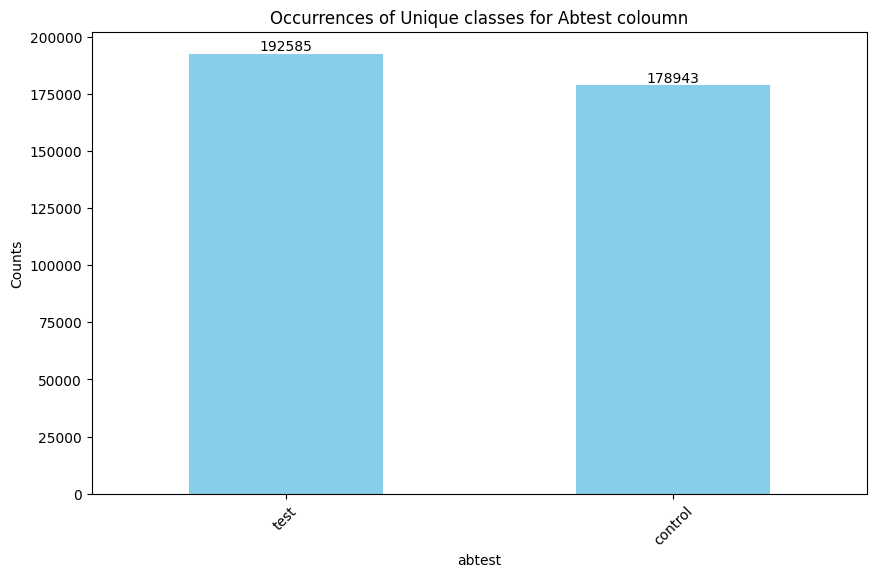

In [13]:
# Now let's check the other coloumn i.e., abtest

# Step 1: Get the unique values in the 'seller' column
unique_sellers = df2['abtest'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['abtest'].value_counts()

# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(10, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for Abtest coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()


The samples for this class are enough for us to use so we dont need to remove this one

In [14]:
# Now let's check the other coloumn i.e., vechile type
df2['vehicleType'].unique()

array([nan, 'coupe', 'suv', 'kleinwagen', 'limousine', 'cabrio', 'bus',
       'kombi', 'andere'], dtype=object)

In [15]:
df2['vehicleType'].isnull().sum()

37869

In [16]:
df2= df2.dropna(subset=['vehicleType']) #removing Null values

In [17]:
df2['vehicleType'].isnull().sum()

0

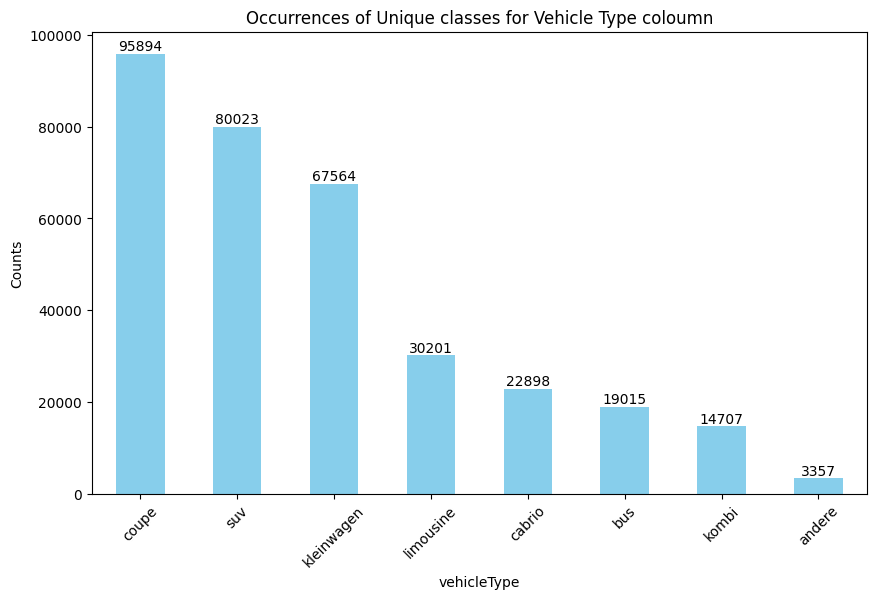

In [18]:
#Let's check unique values or categories for offerType


# Step 1: Get the unique values in the 'seller' column
unique_sellers = df2['vehicleType'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['vehicleType'].value_counts()


# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(10, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for Vehicle Type coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()


In [19]:
df2['offerType'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [20]:
df2['offerType'].value_counts()

offerType
Angebot    333654
Gesuch          5
Name: count, dtype: int64

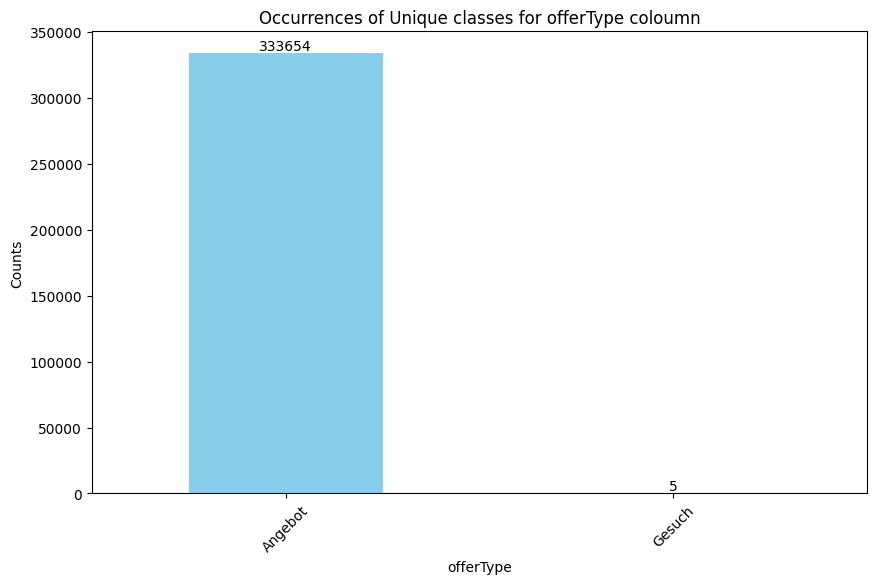

In [21]:
#Let's check unique values or categories for offerType


# Step 1: Get the unique values in the  column
unique_sellers = df2['offerType'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['offerType'].value_counts()


# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(10, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for offerType coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()

here we observed that there are 5 samples for Gesuch so we will also remove this coloumn lesser samples for other class

In [22]:
# Drop the  coloumn from dataframe
df2=df2.drop(['offerType'],axis =1)
df2

price   abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
1       18300     test       coupe                2011    manuell      190   
2        9800     test         suv                2004  automatik      163   
3        1500     test  kleinwagen                2001    manuell       75   
4        3600     test  kleinwagen                2008    manuell       69   
5         650     test   limousine                1995    manuell      102   
...       ...      ...         ...                 ...        ...      ...   
371521   1150  control         bus                2000    manuell        0   
371524   1199     test      cabrio                2000  automatik      101   
371525   9200     test         bus                1996    manuell      102   
371526   3400     test       kombi                2002    manuell      100   
371527  28990  control   limousine                2013    manuell      320   

              model  kilometer  monthOfRegistration fuelType       brand  \
1               NaN     125000                    5   diesel        audi   
2             grand     125000                    8   diesel        jeep   
3              golf     150000                    6   benzin  volkswagen   
4             fabia      90000                    7   diesel       skoda   
5               3er     150000                   10   benzin         bmw   
...             ...        ...                  ...      ...         ...   
371521       zafira     150000                    3   benzin        opel   
371524       fortwo     125000                    3   benzin       smart   
371525  transporter     150000                    3   diesel  volkswagen   
371526         golf     150000                    6   diesel  volkswagen   
371527      m_reihe      50000                    8   benzin         bmw   

       notRepairedDamage  
1                     ja  
2                    NaN  
3                   nein  
4                   nein  
5                     ja  
...                  ...  
371521              nein  
371524              nein  
371525              nein  
371526               NaN  
371527              nein  

[333659 rows x 12 columns]

In [23]:
df2.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')

In [24]:
df2['yearOfRegistration'].unique()

array([2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910, 2007,
       2009, 2002, 1997, 1990, 1981, 2003, 1994, 1991, 1984, 2006, 1999,
       2012, 2010, 2000, 1992, 1993, 2013, 1996, 1989, 2015, 1968, 1982,
       1976, 1983, 1959, 1973, 1969, 1971, 1987, 1986, 1985, 1988, 1967,
       2016, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1977, 1961,
       1963, 1964, 1960, 1966, 1975, 1970, 1937, 1936, 1954, 1958, 1956,
       1933, 1941, 1962, 1929, 1951, 1957, 1940, 1949, 1953, 1935, 2017,
       1950, 2018, 1948, 1952, 1932, 1927, 1923, 1931, 1942, 1911, 1930,
       1944, 1943, 1947, 1934, 1938, 1928, 1919, 1939, 1915, 1920, 1946],
      dtype=int64)

In [25]:
#Checking if their is any year less than 1900 because cars was not manufuctred back then,
years_less_than_1900 = df2[df2['yearOfRegistration'] < 1900]['yearOfRegistration'].unique()

# Step 2: Print the years less than 1900
print("Years less than 1900:")
print(years_less_than_1900)

Years less than 1900:
[]


In [26]:
df2['yearOfRegistration'].value_counts()

yearOfRegistration
1999    22690
2001    20171
2006    19856
2003    19833
2005    19796
        ...  
1911        1
1919        1
1925        1
1915        1
1920        1
Name: count, Length: 99, dtype: int64

In [27]:
#let's remove all those samples which contains less than 100 samples between the year 1900-1999

# Step 1: Filter the DataFrame to keep only the rows with years greater than 1999
df2_filtered = df2[df2['yearOfRegistration'] > 1999]

# Step 2: Use value_counts() to count occurrences of each year in the filtered DataFrame
year_counts = df2_filtered['yearOfRegistration'].value_counts()

# Step 3: Filter the DataFrame again to keep only the rows with years having 100 or more occurrences
df2= df2_filtered[df2_filtered['yearOfRegistration'].isin(year_counts[year_counts >= 100].index)]

# Now df2_filtered will be a new DataFrame with all the samples between 1900 and 1999 (inclusive)
# that have 100 or more occurrences in the 'yearOfRegistration' column.

In [28]:
df2['yearOfRegistration'].value_counts()

yearOfRegistration
2001    20171
2006    19856
2003    19833
2005    19796
2004    19686
2000    19618
2002    19149
2007    17381
2008    15928
2009    15344
2010    12180
2011    11901
2012     9326
2013     6070
2014     4726
2015     2764
2016      421
Name: count, dtype: int64

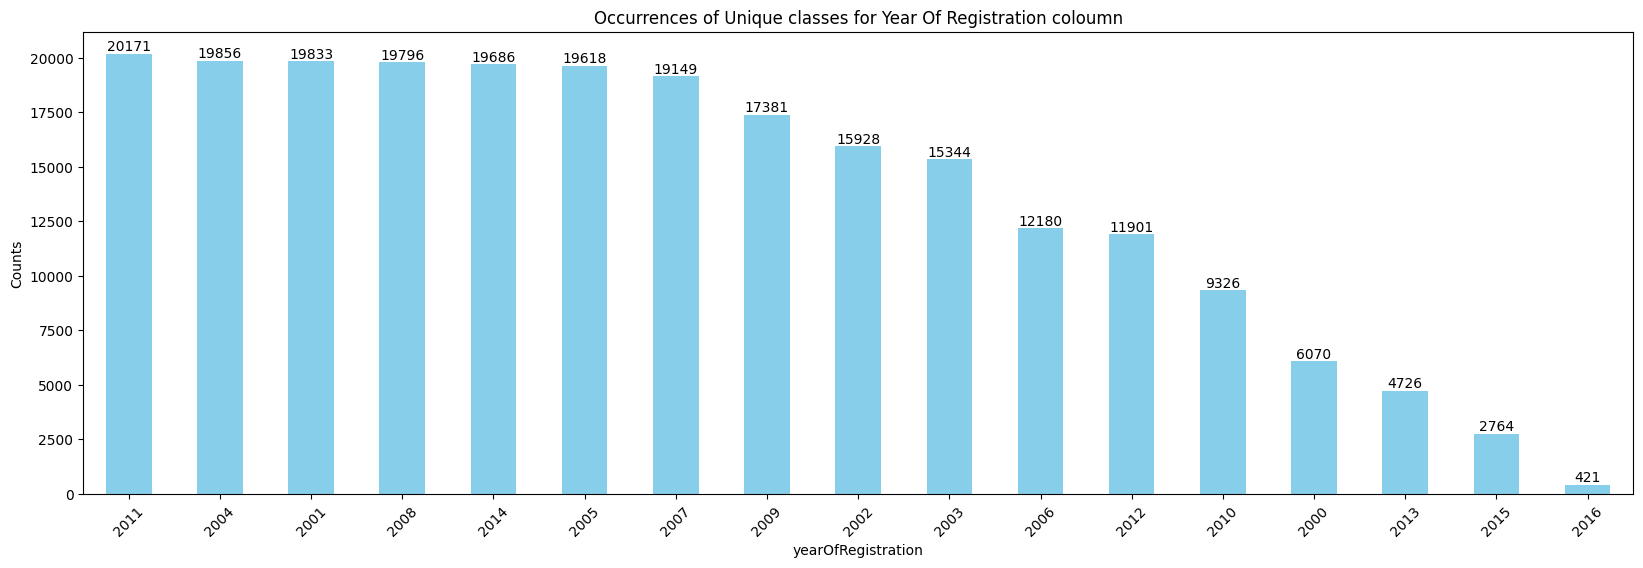

In [29]:
#Let's check unique values or categories for year of Registration


# Step 1: Get the unique values in the 'seller' column
unique_sellers = df2['yearOfRegistration'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['yearOfRegistration'].value_counts()


# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(20, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for Year Of Registration coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()

In [30]:
df2['gearbox'].unique()

array(['manuell', 'automatik', nan], dtype=object)

In [31]:
df2['gearbox'].isnull().sum() #Null values

6244

In [32]:
df2 = df2.dropna(subset=['gearbox']) #removing Null values

In [33]:
df2['gearbox'].isnull().sum() #Null values

0

In [34]:
df2['gearbox'].value_counts()

gearbox
manuell      169980
automatik     57926
Name: count, dtype: int64

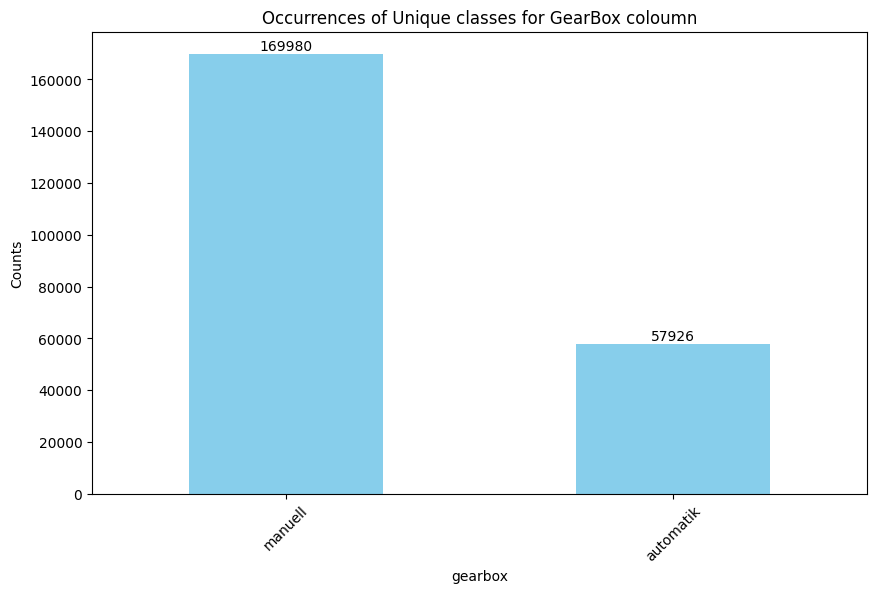

In [35]:
#Let's check unique values or categories for year of Registration


# Step 1: Get the unique values in the  column
unique_sellers = df2['gearbox'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['gearbox'].value_counts()


# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(10, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for GearBox coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()

**let's check for powerPS coloumn** 

In [36]:
df2['powerPS'].isnull().sum() #Null values

0

In [37]:
df2['powerPS'].unique() #here we dont need to change anything

array([  190,   163,    75,    69,   109,   125,   105,   140,   131,
         136,   102,   160,   231,   193,    99,    60,   218,   122,
         129,   306,    95,    61,   177,   170,   143,     0,   232,
          50,   156,    80,    82,   204,   155,   150,   185,    87,
         113,    86,    84,   303,   235,   200,   178,   265,    77,
         144,   120,    54,    90,   110,   184,    88,   101,   194,
          64,   116,   305,   197,   179,   250,   313,    45,   115,
         130,   114,   211,   286,   118,   326,   201,   224,   213,
         107,   174,   100,   220,    73,    41,   192,    68,    74,
          58,    52,   510,   147,    71,    97,    65,   239,   203,
           5,   300,   103,    85,   245,   258,   292,    98,   320,
          63,    81,   148,   354,    83,    70,   145,   280,   260,
         457,   104,   409,   188,   333,   186,   117,   141,   165,
         158,   272,    92,    51,   135,   230,   435,   209,    43,
         146,    67,

In [38]:
df2.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')

**let's check for model coloumn** 

In [39]:
df2['model'].isnull().sum() #Null values

6314

In [40]:
df2= df2.dropna(subset=['model'])

In [41]:
df2['model'].isnull().sum() #Null values

0

In [42]:
df2['model'].unique()

array(['grand', 'golf', 'fabia', '2_reihe', 'c_max', '3_reihe', 'passat',
       'navara', 'twingo', 'a_klasse', 'scirocco', '5er', 'civic',
       'punto', '3er', 'e_klasse', 'andere', 'one', 'fortwo', '1er',
       'b_klasse', 'signum', 'a8', 'jetta', 'fiesta', 'c_klasse', 'micra',
       'vito', 'sprinter', '156', 'xc_reihe', 'scenic', 'a4', 'a1',
       'transporter', 'combo', 'focus', 'astra', 'a6', 'jazz', 'omega',
       'polo', 'slk', 'corsa', '147', 'glk', 'meriva', 'z_reihe',
       'sorento', 'ibiza', 'mustang', 'eos', 'touran', 'getz', 'insignia',
       'ka', 'megane', 'a3', 'lupo', 'mondeo', 'cordoba', 'clio',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'sharan',
       'tt', '6_reihe', 'c4', 'up', 'i_reihe', 'ceed', 'kangoo',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', 'fox', 'matiz',
       'panda', 'beetle', 'rio', 'zafira', 'touareg', 'logan', 'caddy',
       'spider', 'cuore', 's_max', 'modus', 'a2', 'x_reihe', 'a5',
       'galaxy', 'c3

**Let's check for Kilometer coloumn**

In [43]:
df2['kilometer'].unique()

array([125000, 150000,  90000,  30000,  70000, 100000,  60000,  20000,
        80000,  50000,  40000,   5000,  10000], dtype=int64)

In [44]:
df2['kilometer'].isnull().sum() #Null values

0

**Let's check for Month of Registration coloumn**

In [45]:
df2['monthOfRegistration'].unique()

array([ 8,  6,  7, 12,  2,  3,  1,  4,  9, 11,  5,  0, 10], dtype=int64)

In [46]:
df2['monthOfRegistration'].isnull().sum() #Null values

0

**Let's check for Month of Feul Type coloumn**

In [47]:
df2['fuelType'].unique()

array(['diesel', 'benzin', nan, 'lpg', 'andere', 'hybrid', 'cng',
       'elektro'], dtype=object)

In [48]:
df2['fuelType'].isnull().sum() #Null values

5725

In [49]:
df2 = df2.dropna(subset=['fuelType']) #removing Null values

In [50]:
df2['fuelType'].isnull().sum() #Null values

0

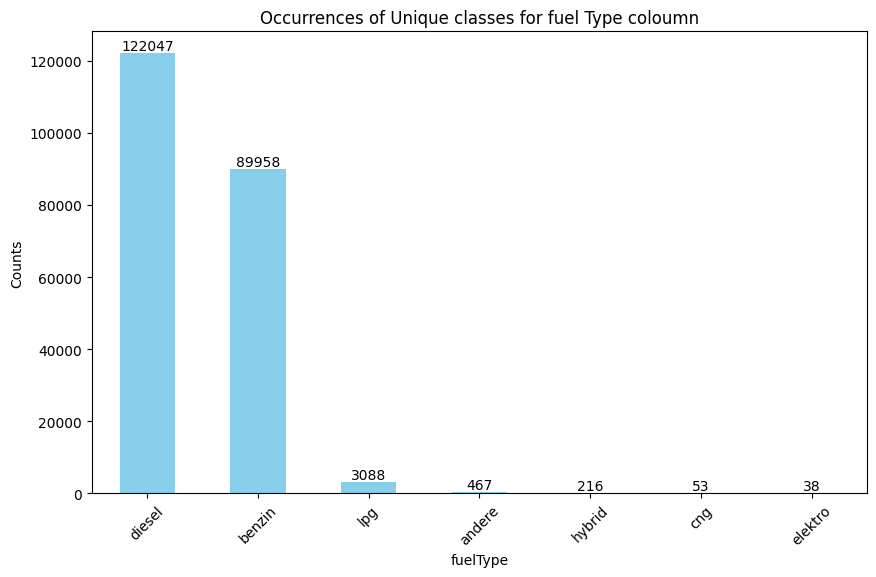

In [51]:
#Let's check unique values or categories for year of Registration


# Step 1: Get the unique values in the 'seller' column
unique_sellers = df2['fuelType'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['fuelType'].value_counts()


# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(10, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for fuel Type coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()

**Let's check for Brand coloumn**

In [52]:
df2['brand'].unique()

array(['jeep', 'volkswagen', 'skoda', 'peugeot', 'ford', 'mazda',
       'nissan', 'renault', 'mercedes_benz', 'bmw', 'honda', 'fiat',
       'mini', 'smart', 'audi', 'alfa_romeo', 'volvo', 'mitsubishi',
       'opel', 'hyundai', 'kia', 'seat', 'lancia', 'porsche', 'citroen',
       'chevrolet', 'dacia', 'daihatsu', 'toyota', 'suzuki', 'chrysler',
       'rover', 'saab', 'daewoo', 'subaru', 'land_rover', 'jaguar',
       'lada', 'trabant'], dtype=object)

In [53]:
df2['brand'].isnull().sum() #Null values

0

In [54]:
df2['brand'].value_counts()

brand
volkswagen       41041
bmw              24816
mercedes_benz    21541
audi             21010
opel             20262
ford             15247
renault          10034
peugeot           7379
fiat              5739
skoda             4688
seat              4535
citroen           3581
smart             3531
mazda             3326
toyota            3286
mini              2992
nissan            2983
hyundai           2877
kia               2083
volvo             1745
alfa_romeo        1520
mitsubishi        1500
porsche           1419
suzuki            1372
honda             1296
chevrolet         1173
chrysler           852
dacia              789
land_rover         558
jeep               454
daihatsu           438
jaguar             393
subaru             348
daewoo             313
saab               255
lancia             224
rover              144
lada               122
trabant              1
Name: count, dtype: int64

In [55]:
df2.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')

**Let's check for Brand coloumn**

In [56]:
df2['notRepairedDamage'].unique()

array([nan, 'nein', 'ja'], dtype=object)

In [57]:
df2['notRepairedDamage'].isnull().sum() #Null values

22014

In [58]:
df2= df2.dropna(subset=['notRepairedDamage'])

In [59]:
df2['notRepairedDamage'].isnull().sum() #Null values

0

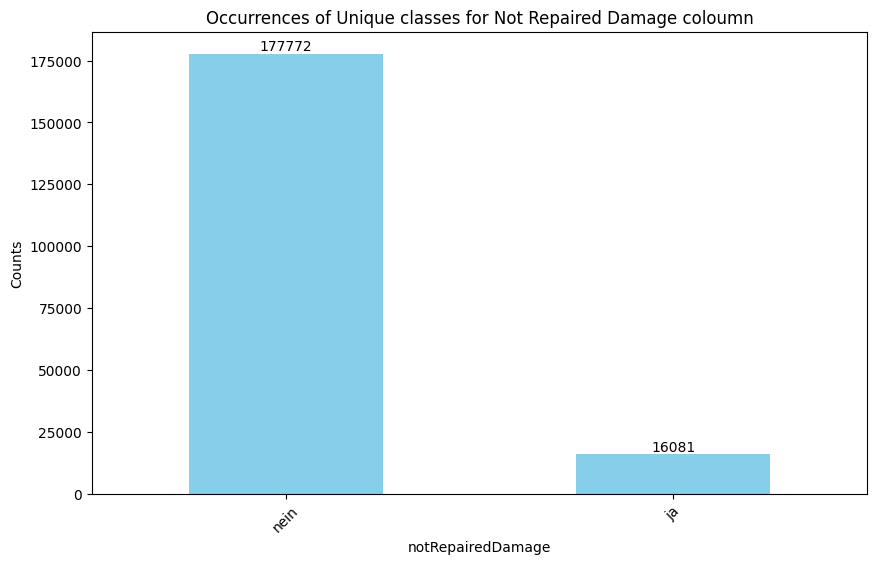

In [60]:
#Let's check unique values or categories for year of Registration


# Step 1: Get the unique values in the 'seller' column
unique_sellers = df2['notRepairedDamage'].unique()

# Step 2: Count the occurrences of each unique value
seller_counts = df2['notRepairedDamage'].value_counts()


# Step 3: Plot the bar chart with counts and unique values
plt.figure(figsize=(10, 6))
ax = seller_counts.plot(kind='bar', color='skyblue', label='Counts')
ax.set_ylabel('Counts')

# Add text labels with counts above each bar
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.title('Occurrences of Unique classes for Not Repaired Damage coloumn')
plt.xticks(range(len(unique_sellers)), unique_sellers, rotation=45)  # Set x-ticks to the unique seller names
plt.show()

# EDA

Now we have done a basic preporcessing removed null values and unncessary coloumns, now we gonna do Exploratory data analysis
for this updated dataframe

In [61]:
df2

price   abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
3        1500     test  kleinwagen                2001    manuell       75   
4        3600     test  kleinwagen                2008    manuell       69   
6        2200     test      cabrio                2004    manuell      109   
10       2000  control   limousine                2004    manuell      105   
11       2799  control       kombi                2005    manuell      140   
...       ...      ...         ...                 ...        ...      ...   
371518   3999     test       kombi                2005    manuell        3   
371520   3200  control   limousine                2004    manuell      225   
371521   1150  control         bus                2000    manuell        0   
371524   1199     test      cabrio                2000  automatik      101   
371527  28990  control   limousine                2013    manuell      320   

          model  kilometer  monthOfRegistration fuelType       brand  \
3          golf     150000                    6   benzin  volkswagen   
4         fabia      90000                    7   diesel       skoda   
6       2_reihe     150000                    8   benzin     peugeot   
10      3_reihe     150000                   12   benzin       mazda   
11       passat     150000                   12   diesel  volkswagen   
...         ...        ...                  ...      ...         ...   
371518      3er     150000                    5   diesel         bmw   
371520     leon     150000                    5   benzin        seat   
371521   zafira     150000                    3   benzin        opel   
371524   fortwo     125000                    3   benzin       smart   
371527  m_reihe      50000                    8   benzin         bmw   

       notRepairedDamage  
3                   nein  
4                   nein  
6                   nein  
10                  nein  
11                    ja  
...                  ...  
371518              nein  
371520                ja  
371521              nein  
371524              nein  
371527              nein  

[193853 rows x 12 columns]

In [62]:
# Data types of each column in the df2  DataFrame
df2.dtypes

price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [63]:
df_EDA= df2

**in order to process we need to convert our object or string type into integar type**

In [64]:
df_EDA['abtest'].unique()

array(['test', 'control'], dtype=object)

In [65]:
label_encoder = LabelEncoder()
#Fit the LabelEncoder on the 'abtest' column and transform it
df_EDA['abtest'] = label_encoder.fit_transform(df_EDA['abtest'])

In [66]:
#Get the mapping of integers to their corresponding classes
abtest_mapping = dict(enumerate(label_encoder.classes_))
print("Mapping of integers to classes in 'abtest' column:")
for key, value in abtest_mapping.items():
    print(f"{key}: {value}")

Mapping of integers to classes in 'abtest' column:
0: control
1: test


In [67]:
df_EDA['abtest'].unique()

array([1, 0])

**Box plot for abtest versus price class**

<Figure size 800x600 with 0 Axes>

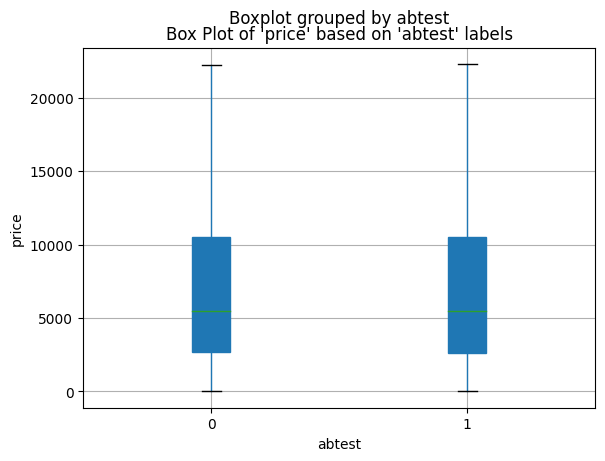

In [68]:
# reate a box plot for 'price' based on 'abtest' labels
plt.figure(figsize=(8, 6))
ax = df_EDA.boxplot(column='price', by='abtest', showfliers=False, patch_artist=True)

# Set the title and labels for the plot
plt.title("Box Plot of 'price' based on 'abtest' labels")
plt.xlabel('abtest')
plt.ylabel('price')


# Show the plot
plt.show()

In [69]:
df2.dtypes

price                   int64
abtest                  int32
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [70]:
# Now let's convert or vehicle Type classes from object to integar
df_EDA['vehicleType'].unique()

array(['kleinwagen', 'cabrio', 'limousine', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

In [71]:
label_encoder = LabelEncoder()
#Fit the LabelEncoder on the 'abtest' column and transform it
df_EDA['vehicleType'] = label_encoder.fit_transform(df_EDA['vehicleType'])
#Get the mapping of integers to their corresponding classes
VT_mapping = dict(enumerate(label_encoder.classes_))
print("Mapping of integers to classes in vehicleType column:")
for key, value in VT_mapping.items():
    print(f"{key}: {value}")

Mapping of integers to classes in vehicleType column:
0: andere
1: bus
2: cabrio
3: coupe
4: kleinwagen
5: kombi
6: limousine
7: suv


<Figure size 800x600 with 0 Axes>

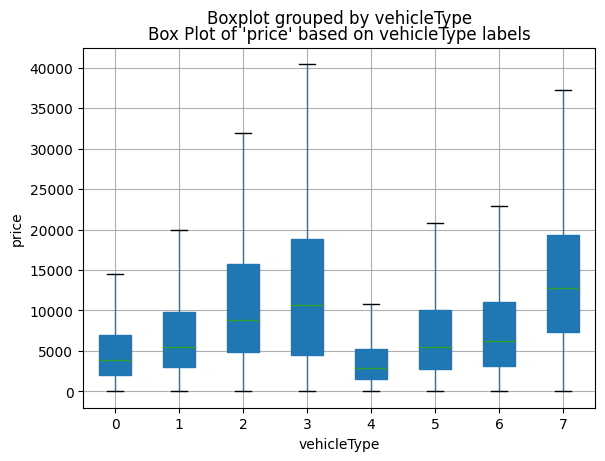

In [72]:
# reate a box plot for 'price' based on 'abtest' labels
plt.figure(figsize=(8, 6))
ax = df_EDA.boxplot(column='price', by='vehicleType', showfliers=False, patch_artist=True)

# Set the title and labels for the plot
plt.title("Box Plot of 'price' based on vehicleType labels")
plt.xlabel('vehicleType')
plt.ylabel('price')


# Show the plot
plt.show()

In [73]:
df_EDA.dtypes

price                   int64
abtest                  int32
vehicleType             int32
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [74]:
df_EDA['gearbox'].unique()

array(['manuell', 'automatik'], dtype=object)

In [75]:
label_encoder = LabelEncoder()
#Fit the LabelEncoder on the 'abtest' column and transform it
df_EDA['gearbox'] = label_encoder.fit_transform(df_EDA['gearbox'])
#Get the mapping of integers to their corresponding classes
GB_mapping = dict(enumerate(label_encoder.classes_))
print("Mapping of integers to classes in GB column:")
for key, value in GB_mapping.items():
    print(f"{key}: {value}")

Mapping of integers to classes in GB column:
0: automatik
1: manuell


<Figure size 800x600 with 0 Axes>

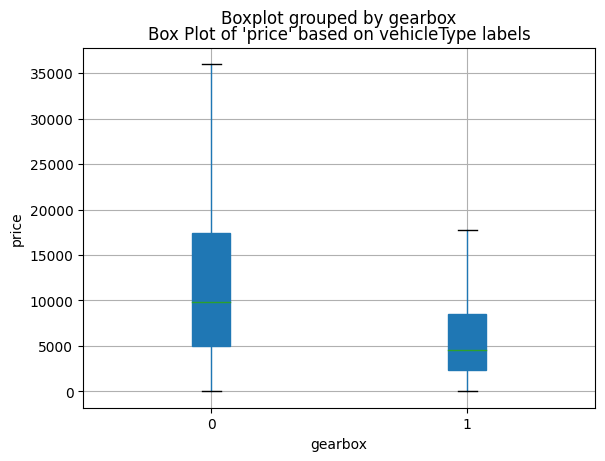

In [76]:
# reate a box plot for 'price' based on 'abtest' labels
plt.figure(figsize=(8, 6))
ax = df_EDA.boxplot(column='price', by='gearbox', showfliers=False, patch_artist=True)

# Set the title and labels for the plot
plt.title("Box Plot of 'price' based on vehicleType labels")
plt.xlabel('gearbox')
plt.ylabel('price')


# Show the plot
plt.show()

In [77]:
df_EDA.dtypes

price                   int64
abtest                  int32
vehicleType             int32
yearOfRegistration      int64
gearbox                 int32
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [78]:
df_EDA['model'].unique()

array(['golf', 'fabia', '2_reihe', '3_reihe', 'passat', 'navara',
       'twingo', 'c_max', 'a_klasse', 'scirocco', '5er', 'civic', 'punto',
       '3er', 'e_klasse', 'andere', 'one', '1er', 'b_klasse', 'fortwo',
       'a8', 'jetta', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter',
       '156', 'scenic', 'a1', 'combo', 'focus', 'astra', 'a6', 'jazz',
       'polo', 'slk', '147', 'glk', 'meriva', 'z_reihe', 'transporter',
       'ibiza', 'mustang', 'eos', 'a4', 'touran', 'getz', 'insignia',
       'megane', 'a3', 'lupo', 'clio', 'vectra', 'berlingo', 'm_klasse',
       'tiguan', 'sharan', 'tt', '6_reihe', 'c4', 'up', 'i_reihe', 'ceed',
       'kangoo', '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', 'corsa',
       'mondeo', 'fox', 'matiz', 'panda', 'beetle', 'rio', 'zafira',
       'touareg', 'logan', 'omega', 'cuore', 's_max', 'modus', 'a2',
       'x_reihe', 'a5', 'galaxy', 'c3', 'viano', 's_klasse', 'avensis',
       'roomster', 'q5', 'santa', 'cooper', 'leon', 'sportage', 'clk

In [79]:
label_encoder = LabelEncoder()
#Fit the LabelEncoder on the 'abtest' column and transform it
df_EDA['model'] = label_encoder.fit_transform(df_EDA['model'])
#Get the mapping of integers to their corresponding classes
Model_mapping = dict(enumerate(label_encoder.classes_))
print("Mapping of integers to classes in model column:")
for key, value in Model_mapping.items():
    print(f"{key}: {value}")

Mapping of integers to classes in model column:
0: 100
1: 145
2: 147
3: 156
4: 159
5: 1_reihe
6: 1er
7: 2_reihe
8: 300c
9: 3_reihe
10: 3er
11: 4_reihe
12: 500
13: 5_reihe
14: 5er
15: 601
16: 6_reihe
17: 6er
18: 7er
19: 80
20: 900
21: 9000
22: 911
23: a1
24: a2
25: a3
26: a4
27: a5
28: a6
29: a8
30: a_klasse
31: accord
32: agila
33: alhambra
34: almera
35: altea
36: amarok
37: andere
38: antara
39: arosa
40: astra
41: auris
42: avensis
43: aveo
44: aygo
45: b_klasse
46: b_max
47: beetle
48: berlingo
49: bora
50: boxster
51: bravo
52: c1
53: c2
54: c3
55: c4
56: c5
57: c_klasse
58: c_max
59: c_reihe
60: caddy
61: calibra
62: captiva
63: carisma
64: carnival
65: cayenne
66: cc
67: ceed
68: charade
69: cherokee
70: citigo
71: civic
72: cl
73: clio
74: clk
75: clubman
76: colt
77: combo
78: cooper
79: cordoba
80: corolla
81: corsa
82: cr_reihe
83: croma
84: crossfire
85: cuore
86: cx_reihe
87: defender
88: delta
89: discovery
90: discovery_sport
91: doblo
92: ducato
93: duster
94: e_klasse


In [80]:
df_EDA.dtypes

price                   int64
abtest                  int32
vehicleType             int32
yearOfRegistration      int64
gearbox                 int32
powerPS                 int64
model                   int32
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [81]:
df_EDA['fuelType'].unique()

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [82]:
label_encoder = LabelEncoder()
#Fit the LabelEncoder on the 'abtest' column and transform it
df_EDA['fuelType'] = label_encoder.fit_transform(df_EDA['fuelType'])
#Get the mapping of integers to their corresponding classes
FT_mapping = dict(enumerate(label_encoder.classes_))
print("Mapping of integers to classes in fuelType column:")
for key, value in FT_mapping.items():
    print(f"{key}: {value}")

Mapping of integers to classes in fuelType column:
0: andere
1: benzin
2: cng
3: diesel
4: elektro
5: hybrid
6: lpg


<Figure size 800x600 with 0 Axes>

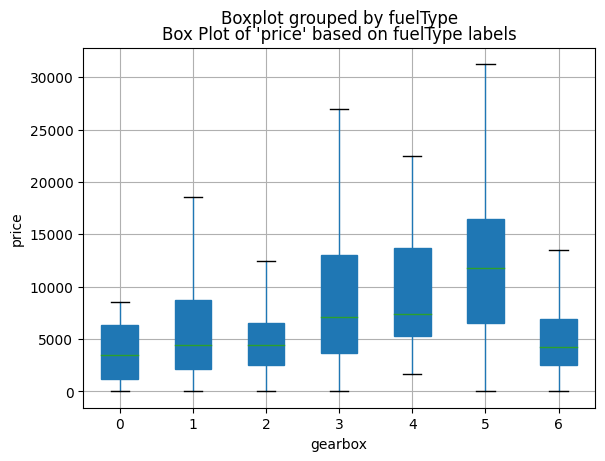

In [83]:
# reate a box plot for 'price' based on 'abtest' labels
plt.figure(figsize=(8, 6))
ax = df_EDA.boxplot(column='price', by='fuelType', showfliers=False, patch_artist=True)

# Set the title and labels for the plot
plt.title("Box Plot of 'price' based on fuelType labels")
plt.xlabel('gearbox')
plt.ylabel('price')


# Show the plot
plt.show()

In [84]:
df_EDA.dtypes

price                   int64
abtest                  int32
vehicleType             int32
yearOfRegistration      int64
gearbox                 int32
powerPS                 int64
model                   int32
kilometer               int64
monthOfRegistration     int64
fuelType                int32
brand                  object
notRepairedDamage      object
dtype: object

In [85]:
df_EDA['brand'].unique()

array(['volkswagen', 'skoda', 'peugeot', 'mazda', 'nissan', 'renault',
       'ford', 'mercedes_benz', 'bmw', 'honda', 'fiat', 'mini', 'smart',
       'audi', 'alfa_romeo', 'mitsubishi', 'opel', 'hyundai', 'seat',
       'lancia', 'porsche', 'citroen', 'kia', 'chevrolet', 'dacia',
       'daihatsu', 'toyota', 'chrysler', 'suzuki', 'rover', 'jeep',
       'saab', 'daewoo', 'subaru', 'volvo', 'land_rover', 'jaguar',
       'lada', 'trabant'], dtype=object)

In [86]:
label_encoder = LabelEncoder()
#Fit the LabelEncoder on the 'abtest' column and transform it
df_EDA['brand'] = label_encoder.fit_transform(df_EDA['brand'])
#Get the mapping of integers to their corresponding classes
b_mapping = dict(enumerate(label_encoder.classes_))
print("Mapping of integers to classes in brand column:")
for key, value in b_mapping.items():
    print(f"{key}: {value}")

Mapping of integers to classes in brand column:
0: alfa_romeo
1: audi
2: bmw
3: chevrolet
4: chrysler
5: citroen
6: dacia
7: daewoo
8: daihatsu
9: fiat
10: ford
11: honda
12: hyundai
13: jaguar
14: jeep
15: kia
16: lada
17: lancia
18: land_rover
19: mazda
20: mercedes_benz
21: mini
22: mitsubishi
23: nissan
24: opel
25: peugeot
26: porsche
27: renault
28: rover
29: saab
30: seat
31: skoda
32: smart
33: subaru
34: suzuki
35: toyota
36: trabant
37: volkswagen
38: volvo


In [87]:
df_EDA.dtypes

price                   int64
abtest                  int32
vehicleType             int32
yearOfRegistration      int64
gearbox                 int32
powerPS                 int64
model                   int32
kilometer               int64
monthOfRegistration     int64
fuelType                int32
brand                   int32
notRepairedDamage      object
dtype: object

In [88]:
df_EDA['notRepairedDamage'].unique()

array(['nein', 'ja'], dtype=object)

In [89]:
label_encoder = LabelEncoder()
#Fit the LabelEncoder on the 'abtest' column and transform it
df_EDA['notRepairedDamage'] = label_encoder.fit_transform(df_EDA['notRepairedDamage'])
#Get the mapping of integers to their corresponding classes
NRD_mapping = dict(enumerate(label_encoder.classes_))
print("Mapping of integers to classes in notRepairedDamage column:")
for key, value in NRD_mapping.items():
    print(f"{key}: {value}")

Mapping of integers to classes in notRepairedDamage column:
0: ja
1: nein


<Figure size 800x600 with 0 Axes>

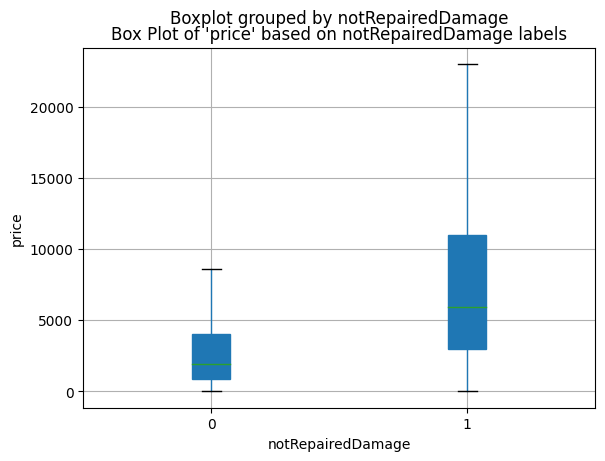

In [90]:
# reate a box plot for 'price' based on 'abtest' labels
plt.figure(figsize=(8, 6))
ax = df_EDA.boxplot(column='price', by='notRepairedDamage', showfliers=False, patch_artist=True)

# Set the title and labels for the plot
plt.title("Box Plot of 'price' based on notRepairedDamage labels")
plt.xlabel('notRepairedDamage')
plt.ylabel('price')


# Show the plot
plt.show()

In [91]:
df_EDA.dtypes

price                  int64
abtest                 int32
vehicleType            int32
yearOfRegistration     int64
gearbox                int32
powerPS                int64
model                  int32
kilometer              int64
monthOfRegistration    int64
fuelType               int32
brand                  int32
notRepairedDamage      int32
dtype: object

In [92]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function removes outliers from a given dataframe by calculating the lower and upper bounds of the interquartile range (IQR). 
    Outliers are defined as values that are less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR, where Q1 and Q3 are the first and third quartiles,
    respectively.

    Input:
    df (pd.DataFrame): A dataframe containing numeric columns

    Output:
    df (pd.DataFrame): A dataframe containing only rows that are not considered outliers
    """
    
    Q1 = df_EDA .quantile(.1, numeric_only=True) # find the Q1 value for each column with numeric data
    Q3 = df_EDA .quantile(.9, numeric_only=True) # find the Q3 value for each column with numeric data
    IQR = Q3 - Q1 # find the interquartile range for each column with numeric data
    
    # return the dataframe with rows that do not have any values lower than Q1 - 1.5 * IQR or higher than Q3 + 1.5 * IQR
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_EDA = remove_outliers(df_EDA)

In [93]:
# Relationship between Kilometer vs Price
fig = px.scatter(data_frame=df_EDA.iloc[:10000], x = "kilometer", y = "price", title="Relationship Between Kilometer and Price") # Plot scatter plot of price vs. Kilometer using the first 10000 rows
fig.show() # Show the plot

In [94]:
# Relationship between  PowerPS vs Price
fig = px.scatter(data_frame=df_EDA.iloc[:10000], x = "powerPS", y = "price", title="Relationship Between  PowerPS and Price") # Plot scatter plot of price vs.  PowerPS using the first 10000 rows
fig.show() # Show the plot

In [95]:
#Box plot for gearbox
fig = px.box(data_frame=df_EDA, x = "price", color="gearbox", title="Price Distribution by Gearbox Type")
fig.show()

**Most expensive car brands based on their mean price**

In [96]:
b_mapping

{0: 'alfa_romeo',
 1: 'audi',
 2: 'bmw',
 3: 'chevrolet',
 4: 'chrysler',
 5: 'citroen',
 6: 'dacia',
 7: 'daewoo',
 8: 'daihatsu',
 9: 'fiat',
 10: 'ford',
 11: 'honda',
 12: 'hyundai',
 13: 'jaguar',
 14: 'jeep',
 15: 'kia',
 16: 'lada',
 17: 'lancia',
 18: 'land_rover',
 19: 'mazda',
 20: 'mercedes_benz',
 21: 'mini',
 22: 'mitsubishi',
 23: 'nissan',
 24: 'opel',
 25: 'peugeot',
 26: 'porsche',
 27: 'renault',
 28: 'rover',
 29: 'saab',
 30: 'seat',
 31: 'skoda',
 32: 'smart',
 33: 'subaru',
 34: 'suzuki',
 35: 'toyota',
 36: 'trabant',
 37: 'volkswagen',
 38: 'volvo'}

In [97]:
expensive_cars = df_EDA["price"].groupby(df_EDA["brand"]).agg(["sum", "count", "mean"]).sort_values(by = "mean", ascending=False)
fig = px.bar(data_frame=expensive_cars, y = "mean", color=expensive_cars.index)
fig.show()

# Corelation

<Axes: >

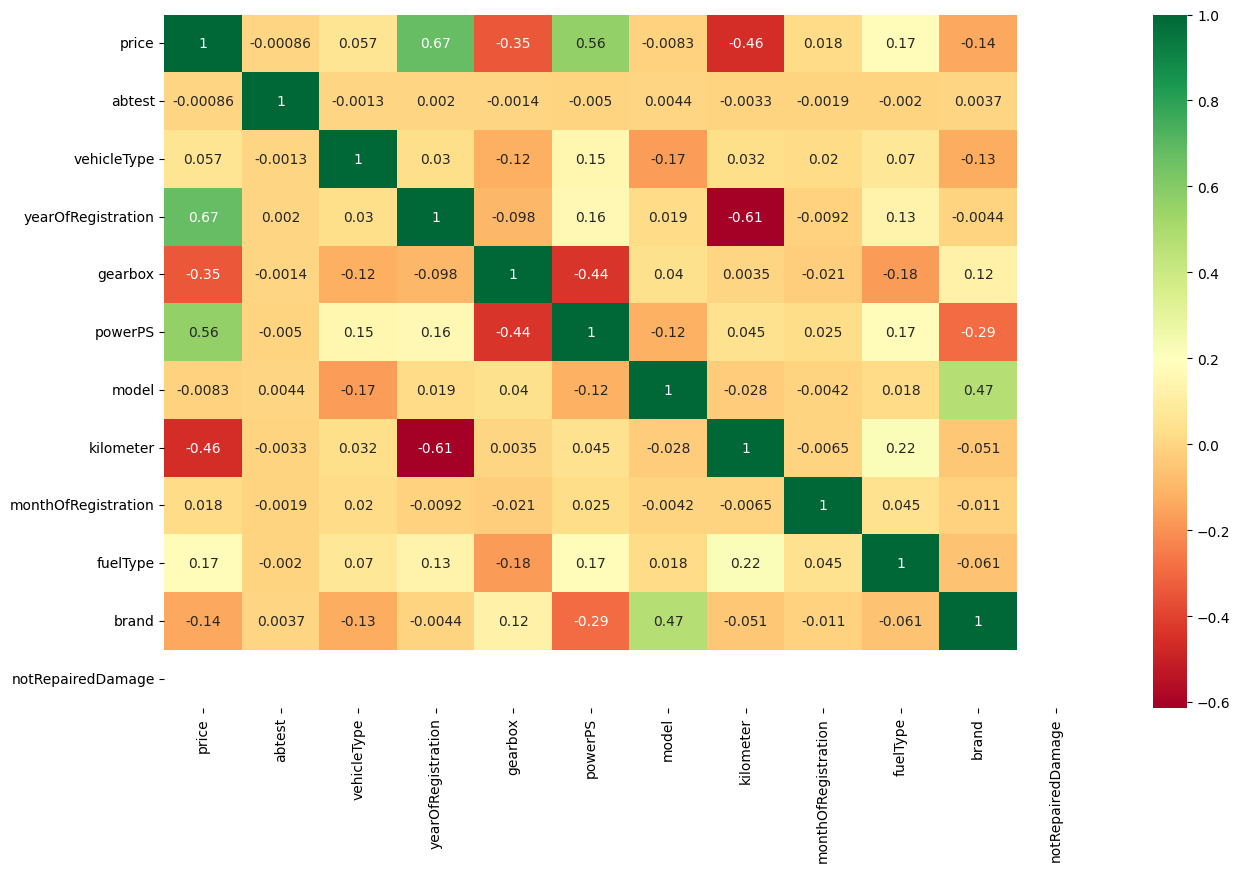

In [98]:
plt.figure(figsize=(15,9)) 
sns.heatmap(df_EDA.corr(), annot = True, cmap = 'RdYlGn')

In [99]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175846 entries, 3 to 371527
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   price                175846 non-null  int64
 1   abtest               175846 non-null  int32
 2   vehicleType          175846 non-null  int32
 3   yearOfRegistration   175846 non-null  int64
 4   gearbox              175846 non-null  int32
 5   powerPS              175846 non-null  int64
 6   model                175846 non-null  int32
 7   kilometer            175846 non-null  int64
 8   monthOfRegistration  175846 non-null  int64
 9   fuelType             175846 non-null  int32
 10  brand                175846 non-null  int32
 11  notRepairedDamage    175846 non-null  int32
dtypes: int32(7), int64(5)
memory usage: 12.7 MB


In [100]:
df_EDA.describe() 

price         abtest    vehicleType  yearOfRegistration  \
count  175846.000000  175846.000000  175846.000000       175846.000000   
mean     8028.181369       0.518624       4.387635         2006.208239   
std      7104.915050       0.499654       1.746640            3.967708   
min         0.000000       0.000000       0.000000         2000.000000   
25%      2900.000000       0.000000       4.000000         2003.000000   
50%      5850.000000       1.000000       5.000000         2006.000000   
75%     10900.000000       1.000000       6.000000         2009.000000   
max     42500.000000       1.000000       7.000000         2016.000000   

             gearbox        powerPS          model      kilometer  \
count  175846.000000  175846.000000  175846.000000  175846.000000   
mean        0.743201     131.356130      97.740267  118453.533205   
std         0.436869      61.852436      71.079812   41858.788472   
min         0.000000       0.000000       0.000000    5000.000000   
25%         0.000000      90.000000      32.000000   90000.000000   
50%         1.000000     122.000000      94.000000  150000.000000   
75%         1.000000     163.000000     160.000000  150000.000000   
max         1.000000     450.000000     241.000000  150000.000000   

       monthOfRegistration       fuelType          brand  notRepairedDamage  
count        175846.000000  175846.000000  175846.000000           175846.0  
mean              6.281331       1.912105      19.549486                1.0  
std               3.414023       1.094847      13.111161                0.0  
min               0.000000       0.000000       0.000000                1.0  
25%               3.000000       1.000000       5.000000                1.0  
50%               6.000000       1.000000      20.000000                1.0  
75%               9.000000       3.000000      31.000000                1.0  
max              12.000000       6.000000      38.000000                1.0

In [101]:
df_EDA

price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
3        1500       1            4                2001        1       75   
4        3600       1            4                2008        1       69   
6        2200       1            2                2004        1      109   
10       2000       0            6                2004        1      105   
14      17999       0            7                2011        1      190   
...       ...     ...          ...                 ...      ...      ...   
371517   7900       1            6                2010        1      140   
371518   3999       1            5                2005        1        3   
371521   1150       0            1                2000        1        0   
371524   1199       1            2                2000        0      101   
371527  28990       0            6                2013        1      320   

        model  kilometer  monthOfRegistration  fuelType  brand  \
3         114     150000                    6         1     37   
4          99      90000                    7         3     31   
6           7     150000                    8         1     25   
10          9     150000                   12         1     19   
14        156      70000                    3         3     23   
...       ...        ...                  ...       ...    ...   
371517    114     150000                    7         3     37   
371518     10     150000                    5         3      2   
371521    241     150000                    3         1     24   
371524    104     125000                    3         1     32   
371527    143      50000                    8         1      2   

        notRepairedDamage  
3                       1  
4                       1  
6                       1  
10                      1  
14                      1  
...                   ...  
371517                  1  
371518                  1  
371521                  1  
371524                  1  
371527                  1  

[175846 rows x 12 columns]

In [102]:
#Clustring code, only run if got enough memory

''''''''''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Assuming you have already read your DataFrame 'df_EDA'
# For example, df_EDA = pd.read_csv('your_file.csv')

# Step 1: Select the feature for clustering (model)
X = df_EDA[['model']]

# Step 2: Standardize the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_EDA['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Step 4: Visualize the DBSCAN clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df_EDA['model'], np.zeros_like(df_EDA['model']), c=df_EDA['dbscan_cluster'], cmap='rainbow')
plt.xlabel('Model')
plt.title('DBSCAN Clustering')
plt.show()

''''''''''

SyntaxError: EOL while scanning string literal (999788156.py, line 31)

# Modeling

In [103]:
#let's train Linear Regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Prepare the data for training
X = df_EDA.drop(['price'], axis=1)  # Features (excluding the 'price' column)
y = df_EDA['price']  # Target variable ('price')

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 14689892.3439718
R-squared: 0.706342821321811


In [106]:
# XGBoost
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [107]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 4685013.536097692
R-squared: 0.9063445922635269


In [110]:
model.save_model(r'C:\Users\umair\OneDrive\Desktop\EDA\xgboost_model_weights.json')

In [111]:
# KNN model
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [112]:
y_pred_knn = knn_model.predict(X_test)

# Step 5: Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Mean Squared Error:", mse_knn)
print("KNN R-squared:", r2_knn)

KNN Mean Squared Error: 7918861.501345465
KNN R-squared: 0.8416985998006508


In [113]:
#Let's train ANN model

from tensorflow import keras
from tensorflow.keras import layers

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Build the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with one neuron for regression
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
3517/3517 [==============================] - 7s 2ms/step - loss: 31593538.0000 - val_loss: 11700265.0000
Epoch 2/100
3517/3517 [==============================] - 6s 2ms/step - loss: 11513070.0000 - val_loss: 11203698.0000
Epoch 3/100
3517/3517 [==============================] - 6s 2ms/step - loss: 11071452.0000 - val_loss: 10785542.0000
Epoch 4/100
3517/3517 [==============================] - 6s 2ms/step - loss: 10750727.0000 - val_loss: 10522436.0000
Epoch 5/100
3517/3517 [==============================] - 6s 2ms/step - loss: 10512985.0000 - val_loss: 10313586.0000
Epoch 6/100
3517/3517 [==============================] - 6s 2ms/step - loss: 10327495.0000 - val_loss: 10148934.0000
Epoch 7/100
3517/3517 [==============================] - 6s 2ms/step - loss: 10184546.0000 - val_loss: 10038219.0000
Epoch 8/100
3517/3517 [==============================] - 6s 2ms/step - loss: 10084551.0000 - val_loss: 9946744.0000
Epoch 9/100
3517/3517 [==============================] - 6s 2ms/s

In [137]:
ann_model = model.save_weights(r'C:\Users\umair\OneDrive\Desktop\EDA\ann_model.h5')

In [140]:
import joblib

# Assuming `ann_model` is your trained ANN model
joblib.dump(ann_model, r'C:\Users\umair\OneDrive\Desktop\EDA\ann_model.joblib')


['C:\\Users\\umair\\OneDrive\\Desktop\\EDA\\ann_model.joblib']

In [114]:
y_pred = model.predict(X_test_scaled)

# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

1100/1100 [==============================] - 1s 703us/step
Mean Squared Error: 7396350.372886329
R-squared: 0.8521438188817989


# Training ANN_V2 model again

In [115]:
df_EDA

price  abtest  vehicleType  yearOfRegistration  gearbox  powerPS  \
3        1500       1            4                2001        1       75   
4        3600       1            4                2008        1       69   
6        2200       1            2                2004        1      109   
10       2000       0            6                2004        1      105   
14      17999       0            7                2011        1      190   
...       ...     ...          ...                 ...      ...      ...   
371517   7900       1            6                2010        1      140   
371518   3999       1            5                2005        1        3   
371521   1150       0            1                2000        1        0   
371524   1199       1            2                2000        0      101   
371527  28990       0            6                2013        1      320   

        model  kilometer  monthOfRegistration  fuelType  brand  \
3         114     150000                    6         1     37   
4          99      90000                    7         3     31   
6           7     150000                    8         1     25   
10          9     150000                   12         1     19   
14        156      70000                    3         3     23   
...       ...        ...                  ...       ...    ...   
371517    114     150000                    7         3     37   
371518     10     150000                    5         3      2   
371521    241     150000                    3         1     24   
371524    104     125000                    3         1     32   
371527    143      50000                    8         1      2   

        notRepairedDamage  
3                       1  
4                       1  
6                       1  
10                      1  
14                      1  
...                   ...  
371517                  1  
371518                  1  
371521                  1  
371524                  1  
371527                  1  

[175846 rows x 12 columns]

In [116]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming your DataFrame is named "df"
X = df_EDA.drop(columns=['price'])
y = df_EDA['price']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a MinMaxScaler object for normalization
scaler_normalize = MinMaxScaler()

# Fit the scaler on the training data
scaler_normalize.fit(X_train)

# Normalize the training and testing data
X_train_normalized = pd.DataFrame(scaler_normalize.transform(X_train), columns=X_train.columns).values
X_test_normalized = pd.DataFrame(scaler_normalize.transform(X_test), columns=X_test.columns).values

# Convert y_train and y_test to numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Create the ANN model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_normalized.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_normalized, y_train, epochs=500, batch_size=64)


Epoch 1/500
1924/1924 [==============================] - 3s 2ms/step - loss: 59573120.0000
Epoch 2/500
1924/1924 [==============================] - 3s 2ms/step - loss: 20973020.0000
Epoch 3/500
1924/1924 [==============================] - 3s 2ms/step - loss: 13410015.0000
Epoch 4/500
1924/1924 [==============================] - 3s 2ms/step - loss: 12129362.0000
Epoch 5/500
1924/1924 [==============================] - 3s 2ms/step - loss: 11612503.0000
Epoch 6/500
1924/1924 [==============================] - 3s 2ms/step - loss: 11324233.0000
Epoch 7/500
1924/1924 [==============================] - 3s 2ms/step - loss: 11134253.0000
Epoch 8/500
1924/1924 [==============================] - 3s 2ms/step - loss: 10995961.0000
Epoch 9/500
1924/1924 [==============================] - 3s 2ms/step - loss: 10884183.0000
Epoch 10/500
1924/1924 [==============================] - 3s 1ms/step - loss: 10785947.0000
Epoch 11/500
1924/1924 [==============================] - 3s 1ms/step - loss: 10690944.00

In [117]:
# Make predictions on the test set
y_pred = model.predict(X_test_normalized).flatten()

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

1649/1649 [==============================] - 1s 702us/step
Mean Squared Error (MSE): 6639954.075199095
Mean Absolute Error (MAE): 1552.1720675964932
R-squared (R2): 0.8679487753468014


In [118]:
X_train

abtest  vehicleType  yearOfRegistration  gearbox  powerPS  model  \
103756       1            1                2012        1      163    189   
319560       1            5                2008        1       68    131   
109129       1            6                2007        1      105     40   
352725       0            5                2007        0      170    166   
275337       0            6                2014        1      150     25   
...        ...          ...                 ...      ...      ...    ...   
252951       0            4                2010        0      122     23   
218642       1            5                2010        1      184     10   
278412       0            4                2004        1       60    140   
310043       1            5                2008        1       80    185   
257346       1            5                2002        0      145    151   

        kilometer  monthOfRegistration  fuelType  brand  notRepairedDamage  
103756      60000                    9         3     10                  1  
319560     150000                    5         3     27                  1  
109129     150000                    5         1     24                  1  
352725     150000                    6         3     37                  1  
275337      50000                    1         3      1                  1  
...           ...                  ...       ...    ...                ...  
252951      50000                    8         1      1                  1  
218642      90000                   12         3      2                  1  
278412     100000                    6         1     37                  1  
310043     100000                    8         3     31                  1  
257346     150000                    6         1     10                  1  

[123092 rows x 11 columns]

In [120]:
X_train.columns

Index(['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

# Prediction

In [176]:
model_path = r'C:\Users\umair\OneDrive\Desktop\EDA\xgboost_model_weights.json'
loaded_model = xgb.Booster()
loaded_model.load_model(model_path)

# the format for prediction shoule be like below 
# ['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 
# 'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage']
new_data = pd.DataFrame({
    'abtest': [1],
    'vehicleType': [2],
    'yearOfRegistration': [2004],
    'gearbox': [1],
    'powerPS': [140],
    'model': [25],
    'kilometer': [12000],
    'monthOfRegistration': [6],
    'fuelType': [3],
    'brand': [10],
    'notRepairedDamage': [1],
})

# Make predictions on the new data
predictions = loaded_model.predict(xgb.DMatrix(new_data))

print(predictions)

[6892.946]


In [129]:
abtest_mapping

{0: 'control', 1: 'test'}

In [134]:
df_EDA['yearOfRegistration'].unique()

array([2001, 2008, 2004, 2011, 2007, 2009, 2002, 2003, 2012, 2014, 2006,
       2010, 2000, 2013, 2005, 2015, 2016], dtype=int64)

In [157]:
abtest_mapping

{0: 'control', 1: 'test'}

In [166]:
VT_mapping

{0: 'andere',
 1: 'bus',
 2: 'cabrio',
 3: 'coupe',
 4: 'kleinwagen',
 5: 'kombi',
 6: 'limousine',
 7: 'suv'}

In [221]:
import tkinter as tk
from tkinter import ttk
import xgboost as xgb
import pandas as pd
from PIL import Image, ImageTk, ImageOps
import cv2


# Load the XGBoost model
loaded_model = xgb.Booster()
loaded_model.load_model('xgboost_model_weights.json')

# Create a dictionary to map the user-friendly options to integer values
abtest_mapping= abtest_mapping
vehicle_type_mapping = VT_mapping

gearbox_mapping = GB_mapping
model_mapping =  Model_mapping

fuel_type_mapping = FT_mapping

brand_mapping = b_mapping


# Create the GUI

# Create the GUI
root = tk.Tk()
root.title('Car Price Prediction')
root.configure(bg='white')  # Set the background color to white

# Load and display the image
image_path = r"C:\Users\umair\Downloads\Auto trade X copy.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image from BGR to RGB
image = Image.fromarray(image)
image.thumbnail((300, 200))
photo = ImageTk.PhotoImage(image)  # Create a PhotoImage object from the Image object
image_label = ttk.Label(image=photo)
image_label.photo = photo  # Store the reference to the PhotoImage object
image_label.grid(row=0, column=3, columnspan=2)

# Function to make predictions
def predict_price():
    global abtest_var, vehicle_type_var, year_var, gearbox_var, powerPS_var
    global model_var, kilometer_var, month_var, FuelType_var, brand_var, notRepairedDamage_var
    
    abtest_value = int(abtest_var.get().lower() == 'test')  # Convert 'test' to 1, 'control' to 0
    vehicle_type_value = list(VT_mapping.keys())[list(VT_mapping.values()).index(vehicle_type_var.get())]
    year_value = int(year_var.get())
    gearbox_value = list(GB_mapping.keys())[list(GB_mapping.values()).index(gearbox_var.get())]
    powerPS_value = int(powerPS_var.get())
    model_value = list(Model_mapping.keys())[list(Model_mapping.values()).index(model_var.get())]
    kilometer_value = int(kilometer_var.get())
    monthOfRegistration_value = int(month_var.get())
    fuel_type_value = list(FT_mapping.keys())[list(FT_mapping.values()).index(FuelType_var.get())]
    brand_value =  list(b_mapping.keys())[list(b_mapping.values()).index(brand_var.get())]
    notRepairedDamage_value = int(notRepairedDamage_var.get())

    # Prepare the new data for prediction
    new_data =   pd.DataFrame({
        'abtest': [abtest_value],
        'vehicleType': [vehicle_type_value],
        'yearOfRegistration': [year_value],
        'gearbox': [gearbox_value],
        'powerPS': [powerPS_value],
        'model': [model_value],
        'kilometer': [kilometer_value],
        'monthOfRegistration': [monthOfRegistration_value],
        'fuelType': [fuel_type_value],
        'brand': [brand_value],
        'notRepairedDamage': [notRepairedDamage_value]
    })

    # Make predictions on the new data
    prediction = loaded_model.predict(xgb.DMatrix(new_data))
    result_label.config(text=f'Predicted Price: {prediction[0]}')

# Create labels and entry fields for user input
abtest_label = ttk.Label(root, text="Abtest type:")
abtest_label.grid(row=5, column=3)
abtest_var = tk.StringVar()
abtest_combobox = ttk.Combobox(root, textvariable=abtest_var, values=list(abtest_mapping.values()))
abtest_combobox.grid(row=5, column=4)


vehicleType_label = ttk.Label(root, text="Vehicle Type:")
vehicleType_label.grid(row=6, column=3)
vehicle_type_var = tk.StringVar()
vehicleType_combobox = ttk.Combobox(root, textvariable=vehicle_type_var, values=list(VT_mapping.values()))
vehicleType_combobox.grid(row=6, column=4)

year_label = ttk.Label(root, text="Year of Registration:")
year_label.grid(row=7, column=3)
year_var = tk.IntVar()
year_combobox = ttk.Combobox(root, textvariable=year_var, values=[2001, 2008, 2004, 2011, 2007, 2009, 2002, 2003, 2012, 2014, 2006, 2010, 2000, 2013, 2005, 2015, 2016])
year_combobox.grid(row=7, column=4)

gearbox_label = ttk.Label(root, text="Gear Box Type:")
gearbox_label.grid(row=8, column=3)
gearbox_var = tk.StringVar()
gearbox_combobox = ttk.Combobox(root, textvariable=gearbox_var, values=list(GB_mapping.values()))
gearbox_combobox.grid(row=8, column=4)

powerPS_label = ttk.Label(root, text="PowerPS Type:")
powerPS_label.grid(row=9, column=3)
powerPS_var = tk.StringVar(value=" ")
powerPS_combobox = ttk.Entry(root, textvariable=powerPS_var)
powerPS_combobox.grid(row=9, column=4)

model_label = ttk.Label(root, text="Model Type:")
model_label.grid(row=10, column=3)
model_var = tk.StringVar()
model_combobox = ttk.Combobox(root, textvariable=model_var, values=list(Model_mapping.values()))
model_combobox.grid(row=10, column=4)

kilometer_label = ttk.Label(root, text="Kilometer :")
kilometer_label.grid(row=11, column=3)
kilometer_var = tk.StringVar(value=" ")
kilometer_combobox = ttk.Entry(root, textvariable=kilometer_var)
kilometer_combobox.grid(row=11, column=4)

month_label = ttk.Label(root, text="Month of Registration:")
month_label.grid(row=12, column=3)
month_var = tk.IntVar()
month_combobox = ttk.Combobox(root, textvariable=month_var, values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
month_combobox.grid(row=12, column=4)

FuelType_label = ttk.Label(root, text="Fuel Type:")
FuelType_label.grid(row=13, column=3)
FuelType_var = tk.StringVar()
FuelType_combobox = ttk.Combobox(root, textvariable=FuelType_var, values=list(FT_mapping.values()))
FuelType_combobox.grid(row=13, column=4)

brand_label = ttk.Label(root, text="Brand Type:")
brand_label.grid(row=14, column=3)
brand_var = tk.StringVar()
brand_combobox = ttk.Combobox(root, textvariable=brand_var, values=list(b_mapping.values()))
brand_combobox.grid(row=14, column=4)


notRepairedDamage_label = ttk.Label(root, text="Repaired Damage:")
notRepairedDamage_label.grid(row=15, column=3)
notRepairedDamage_var = tk.IntVar()
notRepairedDamage_combobox = ttk.Combobox(root, textvariable=notRepairedDamage_var, values=[0, 1])
notRepairedDamage_combobox.grid(row=15, column=4)



# Create a button to predict the price
predict_button = ttk.Button(root, text="Predict Price ", command=predict_price)
predict_button.grid(row=17, column=3, columnspan=2)

# Create a label to display the predicted price
result_label = ttk.Label(root, text="")
result_label.grid(row=18, column=3, columnspan=2)

root.mainloop()

# Streamlit

In [222]:
import streamlit as st
import xgboost as xgb
import pandas as pd
from PIL import Image, ImageOps
import cv2

# Load the XGBoost model
loaded_model = xgb.Booster()
loaded_model.load_model('xgboost_model_weights.json')

# Create a dictionary to map the user-friendly options to integer values
abtest_mapping = abtest_mapping
vehicle_type_mapping = VT_mapping
gearbox_mapping = GB_mapping
model_mapping = Model_mapping
fuel_type_mapping = FT_mapping
brand_mapping = b_mapping

# Load and display the image

def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image.thumbnail((300, 200))
    return image

image_path = r"C:\Users\umair\Downloads\Auto trade X copy.jpg"
image = load_and_preprocess_image(image_path)
st.image(image, caption='Car Image', use_column_width=True)

# Function to make predictions
def predict_price():
    global abtest_var, vehicle_type_var, year_var, gearbox_var, powerPS_var
    global model_var, kilometer_var, month_var, FuelType_var, brand_var, notRepairedDamage_var
    
    abtest_value = int(abtest_var.lower() == 'test')  # Convert 'test' to 1, 'control' to 0
    vehicle_type_value = list(VT_mapping.keys())[list(VT_mapping.values()).index(vehicle_type_var)]
    year_value = int(year_var)
    gearbox_value = list(GB_mapping.keys())[list(GB_mapping.values()).index(gearbox_var)]
    powerPS_value = int(powerPS_var)
    model_value = list(Model_mapping.keys())[list(Model_mapping.values()).index(model_var)]
    kilometer_value = int(kilometer_var)
    monthOfRegistration_value = int(month_var)
    fuel_type_value = list(FT_mapping.keys())[list(FT_mapping.values()).index(FuelType_var)]
    brand_value = list(b_mapping.keys())[list(b_mapping.values()).index(brand_var)]
    notRepairedDamage_value = int(notRepairedDamage_var)

    # Prepare the new data for prediction
    new_data = pd.DataFrame({
        'abtest': [abtest_value],
        'vehicleType': [vehicle_type_value],
        'yearOfRegistration': [year_value],
        'gearbox': [gearbox_value],
        'powerPS': [powerPS_value],
        'model': [model_value],
        'kilometer': [kilometer_value],
        'monthOfRegistration': [monthOfRegistration_value],
        'fuelType': [fuel_type_value],
        'brand': [brand_value],
        'notRepairedDamage': [notRepairedDamage_value]
    })

    # Make predictions on the new data
    prediction = loaded_model.predict(xgb.DMatrix(new_data))
    st.write(f'Predicted Price: {prediction[0]}')

# Create input fields for user input
abtest_var = st.selectbox('Abtest type:', list(abtest_mapping.values()))
vehicle_type_var = st.selectbox('Vehicle Type:', list(VT_mapping.values()))
year_var = st.selectbox('Year of Registration:', [2001, 2008, 2004, 2011, 2007, 2009, 2002, 2003, 2012, 2014, 2006, 2010, 2000, 2013, 2005, 2015, 2016])
gearbox_var = st.selectbox('Gear Box Type:', list(GB_mapping.values()))
powerPS_var = st.number_input('PowerPS Type:')
model_var = st.selectbox('Model Type:', list(Model_mapping.values()))
kilometer_var = st.number_input('Kilometer:')
month_var = st.selectbox('Month of Registration:', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
FuelType_var = st.selectbox('Fuel Type:', list(FT_mapping.values()))
brand_var = st.selectbox('Brand Type:', list(b_mapping.values()))
notRepairedDamage_var = st.selectbox('Repaired Damage:', [0, 1])



# Create a button to predict the price
if st.button('Predict Price'):
    predict_price()
